<a href="https://colab.research.google.com/github/Ilektra-Giassa/Tutorials/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **What was that review again?**
Playing around with IMDB ratings

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
#restricted to the 10000 most frequent words
#25K reviews for training, 25K for testing

17473536/17464789 [==============================] - 1s 0us/step


Decode reviews

In [3]:
word_index = imdb.get_word_index()
#dictionary to map words to integer indices
reverse_word_index = dict (
    #reversion: maps integer indices to words
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join(
    #decoding: offset by 3 - 0, 1, and 2 are reserved for padding, start of sequence, and unknown
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Encode sequences to binary matrix (transform into tensors)
We can either use embedding layer, or OHE. Let's try the latter.

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [10]:
#vectorize labels too
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

### Build the net with 3 dense layers

In [5]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compile the model and configure the optimizer, the losses and metrics

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras import optimizers, losses, metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

### Validation dataset

In [11]:
#10K reviews for validation, 15K for training
x_val=x_train[:10000]
y_val=y_train[:10000]
partial_x_train=x_train[10000:]
partial_y_train=y_train[10000:]

### Training

In [12]:
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
#20 epochs and 512 batch size, thus 15K/512 ~ 30 updates per epoch

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5023 - binary_accuracy: 0.7999 - val_loss: 0.3872 - val_binary_accuracy: 0.8606
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3009 - binary_accuracy: 0.9011 - val_loss: 0.3004 - val_binary_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2176 - binary_accuracy: 0.9275 - val_loss: 0.2785 - val_binary_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1704 - binary_accuracy: 0.9437 - val_loss: 0.2754 - val_binary_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1430 - binary_accuracy: 0.9541 - val_loss: 0.2806 - val_binary_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1141 - binary_accuracy: 0.9646 - val_loss: 0.3061 - val_binary_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - los

### Plotting

In [20]:
import matplotlib.pyplot as plt
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

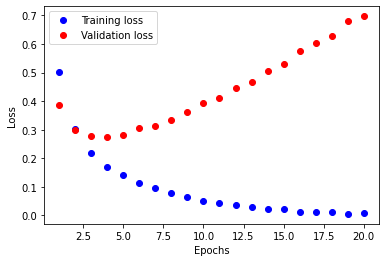

In [35]:
import matplotlib.pyplot as plt
history_dict=history.history
history_dict.keys()
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

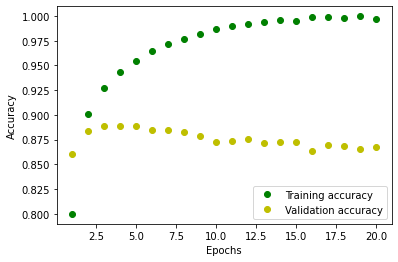

In [36]:
acc_values=history_dict['binary_accuracy']
val_acc_values=history_dict['val_binary_accuracy']
epochs=range(1, 21)
plt.plot(epochs, acc_values, 'go', label="Training accuracy")
plt.plot(epochs, val_acc_values, 'yo', label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Validation accuracy declines after 5th epoch - overfitting

### Retrain with 4 epochs, more than that and we overfit!

In [38]:
models=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [39]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4466 - binary_accuracy: 0.9252
Epoch 2/4
49/49 [==============================] - 2s 41ms/step - loss: 0.2416 - binary_accuracy: 0.9597
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1534 - binary_accuracy: 0.9670
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.4615 - binary_accuracy: 0.8601


In [40]:
model.predict(x_test)
#likelihood of positive review

array([[0.0281319 ],
       [0.97953284],
       [0.9790646 ],
       ...,
       [0.02888918],
       [0.0280742 ],
       [0.9592608 ]], dtype=float32)